In [228]:
#Importing packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import requests # library to handle requests

print("Libraries imported!")

Libraries imported!


In [229]:
df = pd.read_csv('cleaned_full_data.csv', index_col=0)
print(df.shape)
df.head()

(106524, 18)


,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25.0,34.0,AWD,2.0L,Black,Black,Automatic,2.0,5.0,29893,2020,330,BMW
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22.0,28.0,AWD,2.5L,Black,Black,Automatic,2.0,6.0,26225,2018,RAV4,Toyota
7,2017 INFINITI Q60 3.0T Premium,10422,"Woodside, NY 11377",1.1,Gasoline,19.0,27.0,AWD,3.0L,Black,Graphite,Automatic,2.0,3.0,25995,2017,Q60,INFINITI
8,Certified 2017 Mercedes-Benz GLS 450 Base 4MATIC,24351,"Long Island City, NY 11101",4.8,Gasoline,19.0,22.0,AWD,3.0L,Gray,Black,Automatic,3.0,4.0,45594,2017,GLS,Mercedes-Benz
10,2019 Kia Optima LX,23152,"Woodside, NY 11377",3.9,Gasoline,24.0,33.0,FWD,2.4L,Black,Black,Automatic,2.0,7.0,13399,2019,Optima,Kia


In [230]:
y_df = df.loc[:,'Price']
X_df = df[['Make', 'Car Model', 'Model Year', 'Mileage', 'Rating', 'Fuel Type', 'City MPG', 'Highway MPG', 'Drivetrain', 'Engine', 'Exterior Color',
        'Interior Color', 'Transmission', 'Num_ent_features', 'Num_safe_features']]

In [231]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106524 entries, 0 to 164783
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Make               106524 non-null  object 
 1   Car Model          106524 non-null  object 
 2   Model Year         106524 non-null  int64  
 3   Mileage            106524 non-null  int64  
 4   Rating             106524 non-null  float64
 5   Fuel Type          106524 non-null  object 
 6   City MPG           106524 non-null  float64
 7   Highway MPG        106524 non-null  float64
 8   Drivetrain         106524 non-null  object 
 9   Engine             106524 non-null  object 
 10  Exterior Color     106524 non-null  object 
 11  Interior Color     106524 non-null  object 
 12  Transmission       106524 non-null  object 
 13  Num_ent_features   106524 non-null  float64
 14  Num_safe_features  106524 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 13

In [232]:
X_df['Fuel Type'] = X_df['Fuel Type'].apply(lambda x: x.strip())

In [233]:
df = df[['Make', 'Car Model', 'Model Year', 'Mileage', 'Address', 'Rating', 'Fuel Type', 'City MPG', 'Highway MPG', 'Drivetrain', 'Engine', 'Exterior Color',
        'Interior Color', 'Transmission', 'Num_ent_features', 'Num_safe_features', 'Price']]

In [234]:
numeric_subset = ['Model Year', 'Mileage', 'Rating', 'City MPG', 'Highway MPG', 'Num_ent_features', 'Num_safe_features', 'Price']

In [235]:
sub_df = df.loc[:,numeric_subset]
sub_df.head()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price
0,2020,24371,3.5,25.0,34.0,2.0,5.0,29893
2,2018,11863,3.5,22.0,28.0,2.0,6.0,26225
7,2017,10422,1.1,19.0,27.0,2.0,3.0,25995
8,2017,24351,4.8,19.0,22.0,3.0,4.0,45594
10,2019,23152,3.9,24.0,33.0,2.0,7.0,13399


In [236]:
sub_df.corr()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price
Model Year,1.000000,-0.770128,0.018586,0.065748,0.018964,0.279136,0.454570,0.403088
Mileage,-0.770128,1.000000,-0.035637,-0.108570,-0.045325,-0.236965,-0.388252,-0.398638
Rating,0.018586,-0.035637,1.000000,0.006126,0.004622,0.030416,0.029394,0.036520
City MPG,0.065748,-0.108570,0.006126,1.000000,0.419816,-0.028814,0.150985,-0.193830
Highway MPG,0.018964,-0.045325,0.004622,0.419816,1.000000,-0.001213,0.060014,-0.148658
Num_ent_features,0.279136,-0.236965,0.030416,-0.028814,-0.001213,1.000000,0.155113,0.318602
Num_safe_features,0.454570,-0.388252,0.029394,0.150985,0.060014,0.155113,1.000000,0.067920
Price,0.403088,-0.398638,0.036520,-0.193830,-0.148658,0.318602,0.067920,1.000000


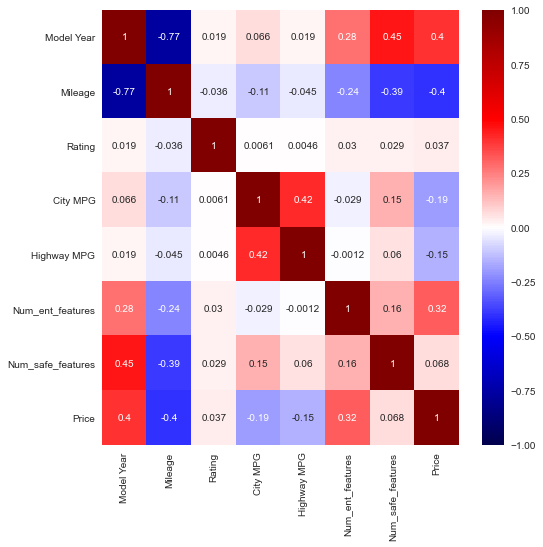

In [237]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(sub_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

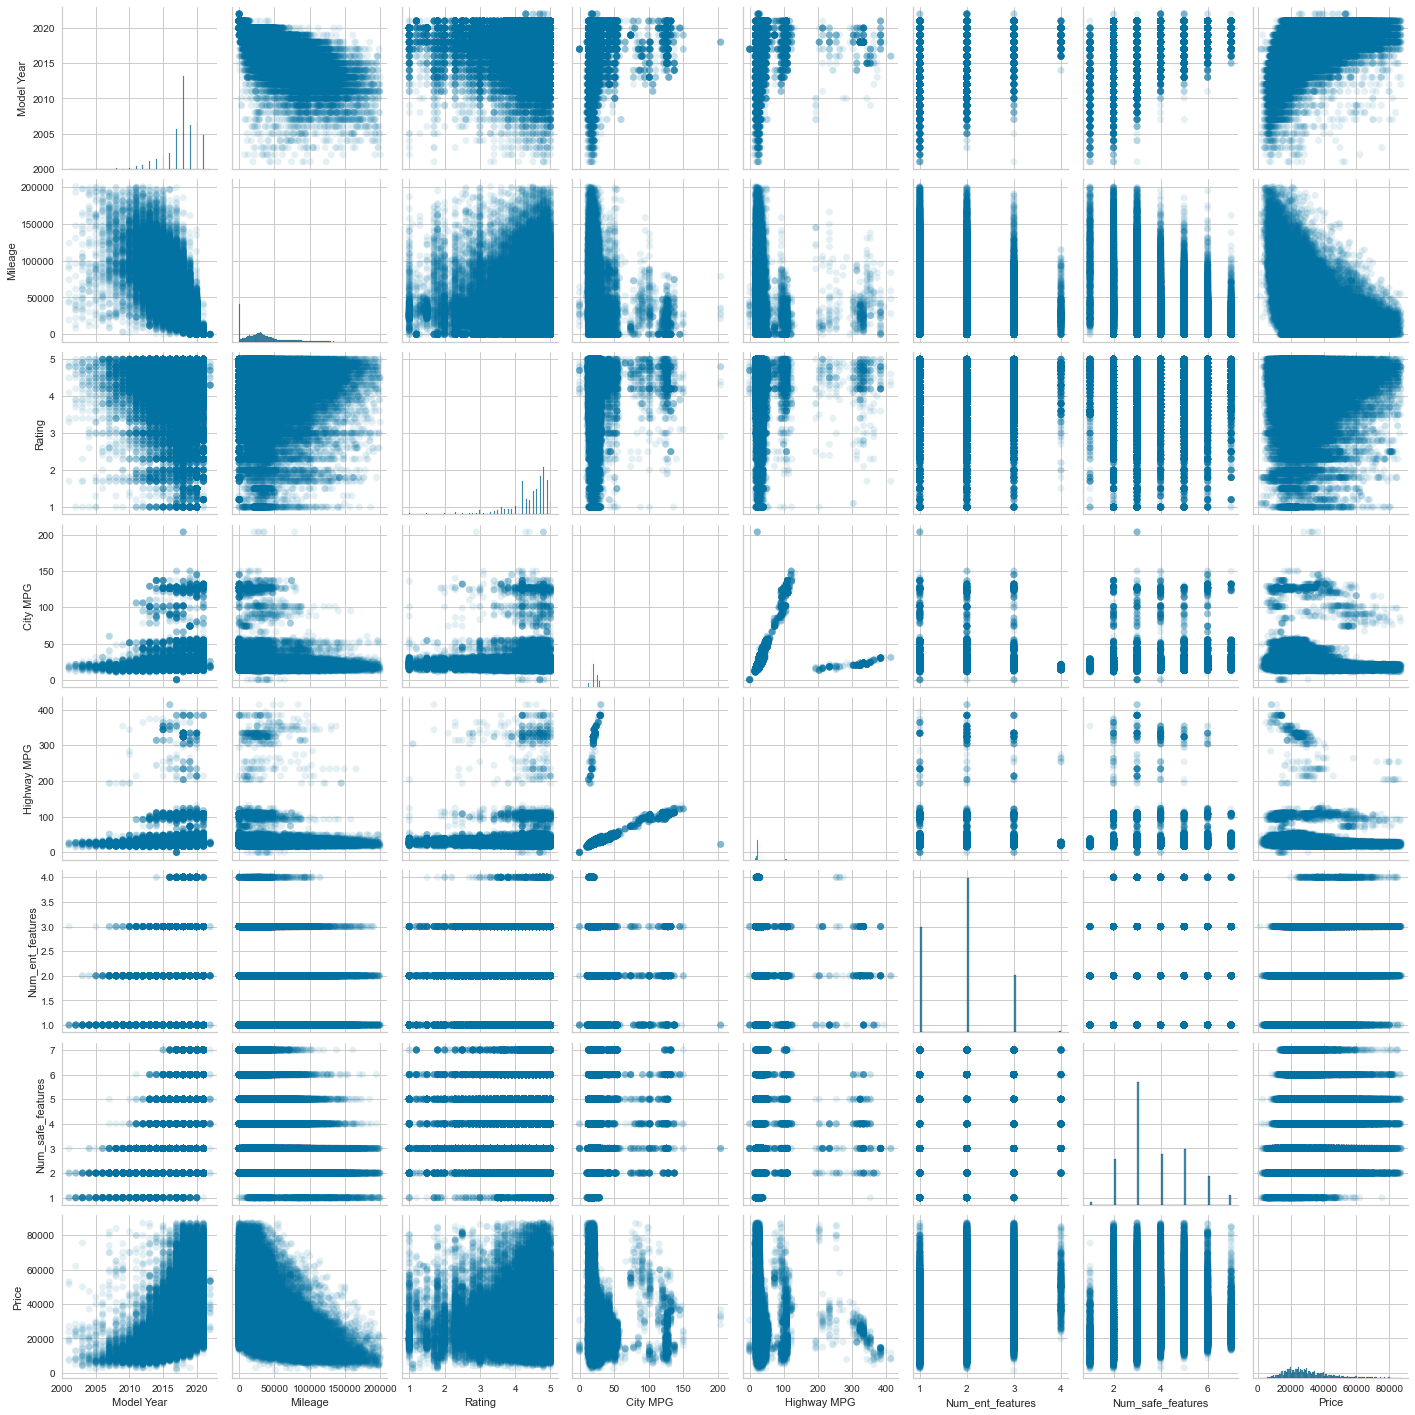

In [238]:
sns.pairplot(sub_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [9]:
# fig = plt.figure(figsize = (18,14)) # create figure

# ax0 = fig.add_subplot(221)
# ax1 = fig.add_subplot(222)  
# ax2 = fig.add_subplot(223)
# ax3 = fig.add_subplot(224)

# # Subplot 1:
# sns.boxplot(x='Model Year',y='Price', data=sub_df, ax=ax0)
# ax0.set_title('Correlation between model year and price')
# ax0.set_xlabel('Model Year')
# ax0.set_ylabel('Price')

# # Subplot 2:
# sns.boxplot(x='Mileage',y='Price',data=sub_df, ax=ax1)
# ax1.set_title('Correlation between mileage and price')
# ax1.set_xlabel('Mileage')
# ax1.set_ylabel('Price')

# #Subplot 3:
# sns.boxplot(x='City MPG',y='Price',data=sub_df, ax=ax2)
# ax2.set_title('Correlation between city MPG and price')
# ax2.set_xlabel('City MPG')
# ax2.set_ylabel('Price')

# #Subplot 4:
# sns.boxplot(x='Highway MPG',y='Price',data=sub_df, ax=ax3)
# ax3.set_title('Correlation between highway MPG and price')
# ax3.set_xlabel('Highway MPG')
# ax3.set_ylabel('Price')


# plt.show()

In [239]:
X_df = sub_df[['Model Year', 'Mileage', 'Rating', 'City MPG', 'Highway MPG', 'Num_ent_features', 'Num_safe_features']]
y_df = sub_df['Price']

In [240]:
X_df

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features
0,2020,24371,3.5,25.0,34.0,2.0,5.0
2,2018,11863,3.5,22.0,28.0,2.0,6.0
7,2017,10422,1.1,19.0,27.0,2.0,3.0
8,2017,24351,4.8,19.0,22.0,3.0,4.0
10,2019,23152,3.9,24.0,33.0,2.0,7.0
...,...,...,...,...,...,...,...
164766,2017,34911,3.2,21.0,28.0,3.0,3.0
164768,2017,46105,3.4,19.0,26.0,2.0,4.0
164775,2017,51170,4.7,17.0,24.0,3.0,2.0
164781,2016,127717,4.8,21.0,28.0,1.0,3.0


In [241]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, y_df, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [242]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.2993718080932545

In [243]:
lm.score(X_train_val, y_train_val)

0.2944719431013274

R^2 is low on both train and val sets, so the model is severely underfit. Let's do polynomial.

In [244]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.47563193785893865

In [245]:
# Score on validation set
lr_poly.score(X_val_poly, y_val)

0.46042020284190777

OK, that's a bit better, but still underfit. Let's work on categorial features.

In [246]:
X_df_2 = X_df.copy()
X_df_2['Make'] = df['Make']
X_df_2 = pd.get_dummies(X_df_2, drop_first=True)
X_df_2.head()

,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Make_Porsche,Make_RAM,Make_Saturn,Make_Scion,Make_Subaru,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Make_smart
0,2020,24371,3.5,25.0,34.0,2.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,11863,3.5,22.0,28.0,2.0,6.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,2017,10422,1.1,19.0,27.0,2.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2017,24351,4.8,19.0,22.0,3.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2019,23152,3.9,24.0,33.0,2.0,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df_2, y_df, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.score(X_train,y_train))
print(lm.score(X_train_val, y_train_val))

0.5032368873531873
0.5012145971772373


In [248]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
print(lr_poly.score(X_train_poly,y_train))

# Score on validation set
print(lr_poly.score(X_val_poly, y_val))

0.7020732783260798
0.6278837964074202


Model is doing a bit overfitting on Polynomial degree 2. Let's regularize it using lasso and ridge

In [249]:
# StandardScaler() our data
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
print(lasso.score(X_train_poly_scaled,y_train))

# Score on validation set
print(lasso.score(X_val_poly_scaled, y_val))

0.6887714810278422
0.6856814026850545


So, it gets better, but the R^2 is still low. Let's try other models.

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

Random Forest Regression: 0.5733116740326523
Gradient Boosted Regression: 0.6018716336714236


OK, so they work better on the original sets, let's see how they perform on the X_f_2 set

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y_df, test_size=0.2,random_state=42)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

Random Forest Regression: 0.3714737503823822
Gradient Boosted Regression: 0.672343398573483


It gets better, but not so much. Let's try something else.

In [252]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df_2, y_df, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.score(X_train,y_train))
print(lm.score(X_train_val, y_train_val))

0.5032368873531873
0.5012145971772373


In [253]:
def split_validate_polynomial(X, y, degree):
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

    poly = PolynomialFeatures(degree=degree)

    X_train_poly = poly.fit_transform(X_train.values)
    X_val_poly = poly.transform(X_val.values)
    X_test_poly = poly.transform(X_test.values)

    lm_poly = LinearRegression()

    lm_poly.fit(X_train_poly, y_train)
    print('Degree {} polynomial regression val R^2: {}'.format(degree, lm_poly.score(X_val_poly, y_val)))


In [254]:
split_validate_polynomial(X_df, y_df, 3)

Degree 3 polynomial regression val R^2: 0.5471779978016093


Let's dummify the entire dataset

In [255]:
X_df[['Car Model', 'Make', 'Fuel Type', 'Drivetrain', 'Engine', 'Exterior Color', 'Interior Color', 'Transmission']] = df[['Car Model', 'Make', 'Fuel Type', 'Drivetrain', 'Engine', 'Exterior Color', 'Interior Color', 'Transmission']]

cars = pd.get_dummies(X_df, drop_first=True)

print(cars.shape)
cars.head()

(106524, 571)


,Model Year,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Car Model_128,Car Model_1500,Car Model_1LT,...,Exterior Color_Other,Exterior Color_Red,Exterior Color_Silver,Exterior Color_White,Interior Color_Charcoal,Interior Color_Ebony,Interior Color_Graphite,Interior Color_Gray,Interior Color_Other,Transmission_Manual
0,2020,24371,3.5,25.0,34.0,2.0,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,11863,3.5,22.0,28.0,2.0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2017,10422,1.1,19.0,27.0,2.0,3.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,2017,24351,4.8,19.0,22.0,3.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2019,23152,3.9,24.0,33.0,2.0,7.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
X_train_val, X_test, y_train_val, y_test = train_test_split(cars, y_df, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.score(X_train,y_train))
print(lm.score(X_train_val, y_train_val))

0.8681752570416329
0.8678765440366586


Much better!!! <br />
Let's regularize and see if it works even better

In [257]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to val set
X_val_scaled = scaler.transform(X_val)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_scaled,y_train)
lasso.score(X_train_scaled,y_train)

0.86748482124816

In [258]:
# Score on validation set
lasso.score(X_val_scaled, y_val)

0.8665540023309218

In [259]:
ridge = RidgeCV()
ridge.fit(X_train_scaled,y_train)
ridge.score(X_train_scaled,y_train)

0.8681465263534325

In [260]:
# Score on validation set
ridge.score(X_val_scaled, y_val)

0.8670805034840019

Looks like both Lasso and Ridge models don't work any better than our simple Linear Regression model. <br/>
Next, let's do K-fold CV to validate our results.

## K-fold CV

In [261]:
X_train, X_test, y_train, y_test = train_test_split(cars, y_df, test_size=0.2,random_state=42)

In [262]:
from sklearn.model_selection import cross_val_score, KFold
lm = LinearRegression()

cross_val_score(lm, cars, y_df, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.84535601, 0.86700899, 0.86500184, 0.86494413, 0.86345675])

In [263]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, cars, y_df, cv=kf, scoring='r2')

array([0.86413298, 0.86509753, 0.87064167, 0.86732102, 0.8674217 ])

In [264]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, cars, y_df, cv=kf, scoring='r2')))

0.8668081469825795


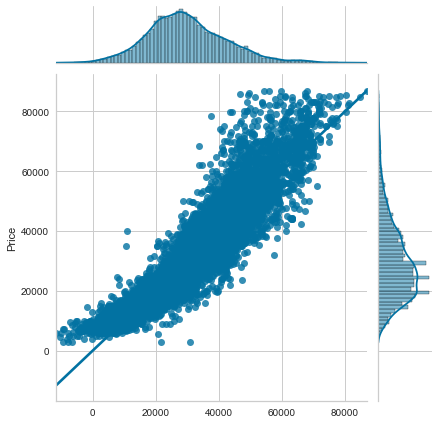

In [265]:
X_train, X_test, y_train, y_test = train_test_split(cars, y_df, test_size=0.2,random_state=42)

#Train the model on the whole train set
lm = LinearRegression()
lm.fit(X_train, y_train)

#Run the model on the entire set

y_pred = lm.predict(X_test)

# kind must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']`
sns.jointplot(y_pred, y_test, kind='reg')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [266]:
print(f'Linear Regression R^2 score on train set: {lm.score(X_train, y_train):.4f}')
print(f'Linear Regression R^2 score on test set: {lm.score(X_test, y_test):.4f}')

y_pred = lm.predict(X_test)
#Display some of the metrics:

print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Square Error (RMSE): {}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

Linear Regression R^2 score on train set: 0.8684
Linear Regression R^2 score on test set: 0.8695
Mean Absolute Error: 3373.676688529683
Mean Squared Error: 23267822.160674967
Root Mean Square Error (RMSE): 4823.673098446346


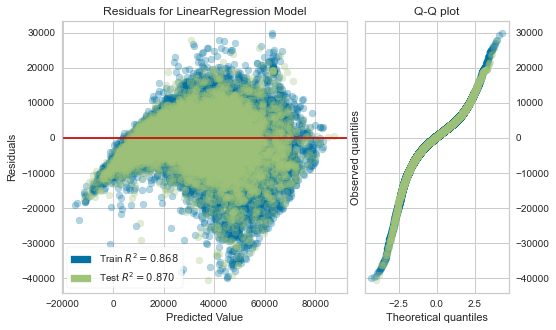

In [267]:

#!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

#Split again 8-2
X_train, X_test, y_train, y_test = train_test_split(cars, y_df, test_size=0.2,random_state=42)

lm = LinearRegression()

plt.figure(figsize=(8,5))

res_plt = ResidualsPlot(lm, hist=False, qqplot=True, train_alpha=0.3, test_alpha=0.3, line_color='r')

res_plt.fit(X_train, y_train)  # Fit the training data to the visualizer
res_plt.score(X_test, y_test)  # Evaluate the model on the test data
res_plt.show();

In [268]:
import joblib

joblib.dump(lm, "lin_model.pkl")

['lin_model.pkl']

In [269]:
my_model_loaded = joblib.load('lin_model.pkl')
my_model_loaded

LinearRegression()

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(cars, y_df, test_size=0.2,random_state=42)

# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# print("Random Forest Regression:", r2_score(y_test, y_pred))

# gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
# gbm.fit(X_train, y_train)
# y_pred = gbm.predict(X_test)
# print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(cars, y_df, test_size=0.2,random_state=42)

# ## Scale the data as before
# std = StandardScaler()
# std.fit(X_train.values)

# ## Scale the Predictors on both the train and test set
# X_tr = std.transform(X_train.values)
# X_te = std.transform(X_test.values)

# # Run the cross validation, find the best alpha, refit the model on all the data with that alpha

# alphavec = 10**np.linspace(-2,2,200)

# lasso_model = LassoCV(alphas = alphavec, cv=5)
# lasso_model.fit(X_tr, y_train)

# #Best alpha = 0.24374441501222205
# lasso_model.fit(X_tr, y_train)
# lasso_model.alpha_

# # These are the (standardized) coefficients found
# # when it refit using that best alpha
# list(zip(X_train.columns, lasso_model.coef_))

# # Make predictions on the test set using the new model
# y_pred = lasso_model.predict(X_te)

# #Display some of the metrics:

# print('R^2 score on test set: {}'.format(r2_score(y_pred, y_test)))
# print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
# print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))
# print('Root Mean Square Error (RMSE): {}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

# ridge_model = RidgeCV(alphas = alphavec, cv=5)
# ridge_model.fit(X_tr, y_train)

# #Best alpha = 0.01
# ridge_model.fit(X_tr, y_train)
# ridge_model.alpha_

# # These are the (standardized) coefficients found
# # when it refit using that best alpha
# list(zip(X_train.columns, ridge_model.coef_))

# # Make predictions on the test set using the new model
# y_pred = ridge_model.predict(X_te)

# #Display some of the metrics:

# print('R^2 score on test set: {}'.format(r2_score(y_pred, y_test)))
# print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test, y_pred)))
# print('Mean Squared Error: {}'.format(mean_squared_error(y_test, y_pred)))
# print('Root Mean Square Error (RMSE): {}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

In [274]:
#Create the model for streamlit

model = LinearRegression()
model.fit(pd.get_dummies(X_df, drop_first=True), y_df)
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [273]:
model

LinearRegression()